# Implementation of MLP in MNIST digits dataset

Import Library

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Dropout
from keras.utils import np_utils

Load dataset

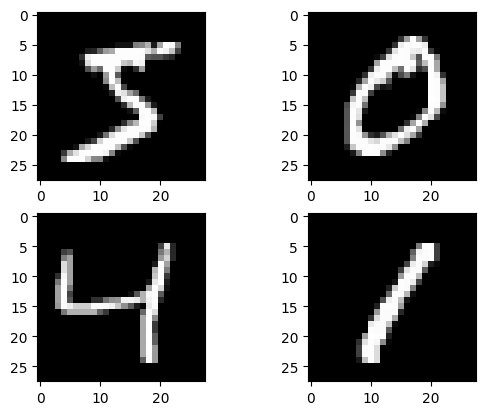

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
(X_train,y_train),(X_test,y_test) = mnist.load_data()
#Normalise dataset so it lies between 0 and 1
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Reshape the array dimension




In [ ]:
#training dataset = 60000 images with 28*28 pixels
#testing dataset = 10000 images with 28*28 pixels
print(X_train.shape)
print(X_test.shape)
#28*28 = 784 1D vector
num_pixels = X_train.shape[1] *  X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


Normalise dataset

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Create model with 128 hidden nodes

In [ ]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal',activation= 'relu'))
model.add(Dense(128,kernel_initializer= 'normal', activation= 'relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation= 'softmax' ))
# Compile model
# Use default learning_rate = 0.001
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 784)               615440    
                                                                 
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dense_77 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


Train model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1853 - accuracy: 0.9430 - root_mean_squared_error: 0.0924
Epoch 2/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0844 - accuracy: 0.9736 - root_mean_squared_error: 0.0634
Epoch 3/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0625 - accuracy: 0.9809 - root_mean_squared_error: 0.0542
Epoch 4/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0484 - accuracy: 0.9854 - root_mean_squared_error: 0.0474
Epoch 5/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0426 - accuracy: 0.9868 - root_mean_squared_error: 0.0452
Epoch 6/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0392 - accuracy: 0.9889 - root_mean_squared_error: 0.0424
Epoch 7/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0313 - accuracy: 0.9909 - root_mean_squared_error: 0.0376
Epoch 8/10
6000/6000 [===================

In [ ]:
scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.3f " % (model.metrics_names[2], scores[2]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9799 - root_mean_squared_error: 0.0590

accuracy: 97.99%

root_mean_squared_error: 0.059 


Create another model with 1 hidden layer with 256 nodes,learning rate = 0.005

In [ ]:
model2 = Sequential()
model2.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal',activation= 'relu'))
model2.add(Dense(256,kernel_initializer= 'normal', activation= 'relu'))
model2.add(Dense(num_classes, kernel_initializer='normal', activation= 'softmax' ))
# Compile model
op = tf.keras.optimizers.Adam(learning_rate=0.005)
model2.compile(loss= 'categorical_crossentropy' , optimizer= op , metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 784)               615440    
                                                                 
 dense_79 (Dense)            (None, 256)               200960    
                                                                 
 dense_80 (Dense)            (None, 10)                2570      
                                                                 
Total params: 818,970
Trainable params: 818,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.2909 - accuracy: 0.9214 - root_mean_squared_error: 0.1092
Epoch 2/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1903 - accuracy: 0.9507 - root_mean_squared_error: 0.0868
Epoch 3/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1668 - accuracy: 0.9589 - root_mean_squared_error: 0.0792
Epoch 4/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1432 - accuracy: 0.9662 - root_mean_squared_error: 0.0732
Epoch 5/10
6000/6000 [==============================] - 36s 6ms/step - loss: 0.1351 - accuracy: 0.9671 - root_mean_squared_error: 0.0706
Epoch 6/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1233 - accuracy: 0.9716 - root_mean_squared_error: 0.0662
Epoch 7/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1165 - accuracy: 0.9740 - root_mean_squared_error: 0.0633
Epoch 8/10
6000/6000 [===================

In [ ]:
scores = model2.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
print("\n%s: %.3f " % (model2.metrics_names[2], scores[2]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.9608 - root_mean_squared_error: 0.0761

accuracy: 96.08%

root_mean_squared_error: 0.076 


Create model with 2 hidden layers(256 + 128 nodes), learning_rate = 0.001

In [ ]:
model3 = Sequential()
model3.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal',activation= 'relu'))
model3.add(Dense(256,kernel_initializer= 'normal', activation= 'relu'))
model3.add(Dense(128,kernel_initializer= 'normal', activation= 'relu'))
model3.add(Dense(num_classes, kernel_initializer='normal', activation= 'softmax' ))
# Compile model
# Use default learning_rate = 0.001
model3.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 784)               615440    
                                                                 
 dense_82 (Dense)            (None, 256)               200960    
                                                                 
 dense_83 (Dense)            (None, 128)               32896     
                                                                 
 dense_84 (Dense)            (None, 10)                1290      
                                                                 
Total params: 850,586
Trainable params: 850,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 39s 6ms/step - loss: 0.2027 - accuracy: 0.9400 - root_mean_squared_error: 0.0955
Epoch 2/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0983 - accuracy: 0.9715 - root_mean_squared_error: 0.0661
Epoch 3/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0731 - accuracy: 0.9787 - root_mean_squared_error: 0.0574
Epoch 4/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0604 - accuracy: 0.9829 - root_mean_squared_error: 0.0517
Epoch 5/10
6000/6000 [==============================] - 37s 6ms/step - loss: 0.0531 - accuracy: 0.9851 - root_mean_squared_error: 0.0482
Epoch 6/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0451 - accuracy: 0.9879 - root_mean_squared_error: 0.0439
Epoch 7/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0438 - accuracy: 0.9882 - root_mean_squared_error: 0.0428
Epoch 8/10
6000/6000 [===================

In [ ]:
scores = model3.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
print("\n%s: %.3f " % (model3.metrics_names[2], scores[2]))

313/313 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9792 - root_mean_squared_error: 0.0574

accuracy: 97.92%

root_mean_squared_error: 0.057 


# Implementation of MLP with Data Augmentation using MNIST Dataset

Show original image

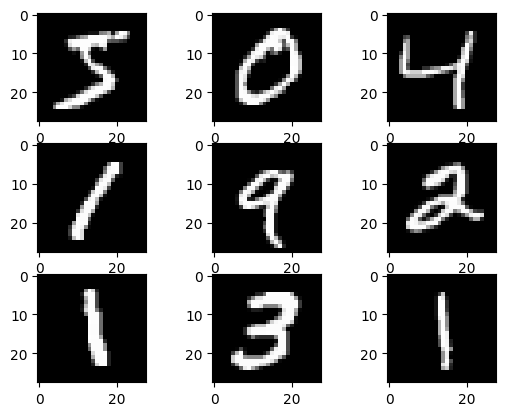

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Preprocessing of the train and test set

In [ ]:
# image dimensions
image_size = X_train.shape[1]
input_size = image_size * image_size
# we train our network using float data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# convert from int to float
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Create model with 128 hidden nodes (1 layer)

In [ ]:
# network parameters
batch_size = 128
data_augmentation = True
epochs = 3
max_batches = len(X_train) / batch_size

model = Sequential()
model.add(Dense(128, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
# this is the output for one-hot vector
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model.summary()


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 128)               100480    
                                                                 
 activation_33 (Activation)  (None, 128)               0         
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                                                                 
 activation_34 (Activation)  (None, 128)               0         
                                                                 
 dense_99 (Dense)            (None, 10)                1290      
                                                                 
 activation_35 (Activation)  (None, 10)                0         
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-t

Model Training

In [ ]:
X_train = numpy.reshape(X_train, [-1, image_size, image_size, 1])
datagen = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

for e in range(epochs):
  print('Epoch', e)
  batches = 0
  for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size):
    x_batch = numpy.reshape(x_batch, [-1, image_size*image_size])
    model.fit(x_batch, y_batch)
    batches += 1
    if batches >= len(X_train) / 32:
       # we need to break the loop by hand because
       # the generator loops indefinitely
      break

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 8ms/step - loss: 0.0697 - accuracy: 0.9688 - root_mean_squared_error: 0.0608
Epoch 1
4/4 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.9766 - root_mean_squared_error: 0.0621
Epoch 2
4/4 [==============================] - 0s 6ms/step - loss: 0.1176 - accuracy: 0.9375 - root_mean_squared_error: 0.0796


Evaluation

In [ ]:
X_test = numpy.reshape(X_test, [-1, input_size])
scores = model.evaluate(X_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=False)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.3f " % (model.metrics_names[2], scores[2]))


accuracy: 98.36%

root_mean_squared_error: 0.050 


Create model with 1 hidden layer of 256 nodes,learning_rate = 0.005

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
data_augmentation = True
epochs = 3
max_batches = len(X_train) / batch_size
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_classes))
# this is the output for one-hot vector
model.add(Activation('softmax'))
op = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',
              optimizer=op,
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trai

Training

In [ ]:
X_train = numpy.reshape(X_train, [-1, image_size, image_size, 1])
datagen = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

for e in range(epochs):
  print('Epoch', e)
  batches = 0
  for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size):
    x_batch = numpy.reshape(x_batch, [-1, image_size*image_size])
    model.fit(x_batch, y_batch)
    batches += 1
    if batches >= len(X_train) / 32:
       # we need to break the loop by hand because
       # the generator loops indefinitely
      break

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 7ms/step - loss: 0.2920 - accuracy: 0.8906 - root_mean_squared_error: 0.1251
Epoch 1
4/4 [==============================] - 0s 7ms/step - loss: 0.1561 - accuracy: 0.9453 - root_mean_squared_error: 0.0873
Epoch 2
4/4 [==============================] - 0s 7ms/step - loss: 0.2422 - accuracy: 0.9375 - root_mean_squared_error: 0.0992


Evaluation

In [ ]:
X_test = numpy.reshape(X_test, [-1, input_size])
scores = model.evaluate(X_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=False)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.3f " % (model.metrics_names[2], scores[2]))


accuracy: 96.78%

root_mean_squared_error: 0.071 


Create model with 2 hidden layer (256+128) hidden nodes

In [ ]:
# network parameters
batch_size = 128
data_augmentation = True
epochs = 3
max_batches = len(X_train) / batch_size

model = Sequential()
model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
# this is the output for one-hot vector
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 activation_9 (Activation)   (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)               

Training

In [ ]:
X_train = numpy.reshape(X_train, [-1, image_size, image_size, 1])
datagen = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

for e in range(epochs):
  print('Epoch', e)
  batches = 0
  for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size):
    x_batch = numpy.reshape(x_batch, [-1, image_size*image_size])
    model.fit(x_batch, y_batch)
    batches += 1
    if batches >= len(X_train) / 32:
       # we need to break the loop by hand because
       # the generator loops indefinitely
      break

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 7ms/step - loss: 0.1367 - accuracy: 0.9531 - root_mean_squared_error: 0.0844
Epoch 1
4/4 [==============================] - 0s 9ms/step - loss: 0.0850 - accuracy: 0.9688 - root_mean_squared_error: 0.0690
Epoch 2
4/4 [==============================] - 0s 9ms/step - loss: 0.1353 - accuracy: 0.9688 - root_mean_squared_error: 0.0743


Evaluation

In [ ]:
X_test = numpy.reshape(X_test, [-1, input_size])
scores = model.evaluate(X_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=False)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.3f " % (model.metrics_names[2], scores[2]))


accuracy: 98.11%

root_mean_squared_error: 0.054 
